# Marks Prediction using Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Exam_Score_Prediction.csv')
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# EDA

In [3]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df.shape

(20000, 13)

In [5]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
len(df.columns)

13

In [8]:
df.course.unique()

array(['diploma', 'bca', 'b.sc', 'b.tech', 'bba', 'ba', 'b.com'],
      dtype=object)

In [9]:
df.set_index('student_id',inplace=True)

In [10]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# Data Visulization

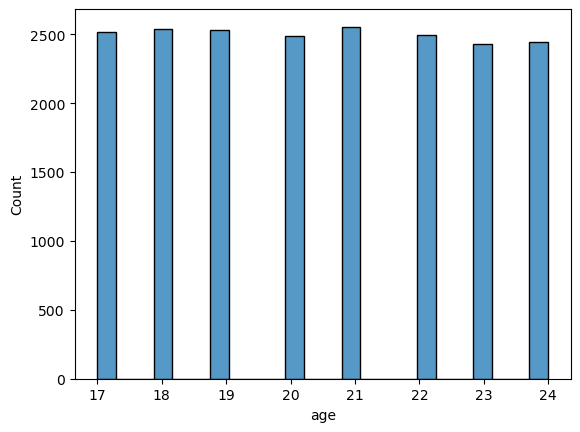

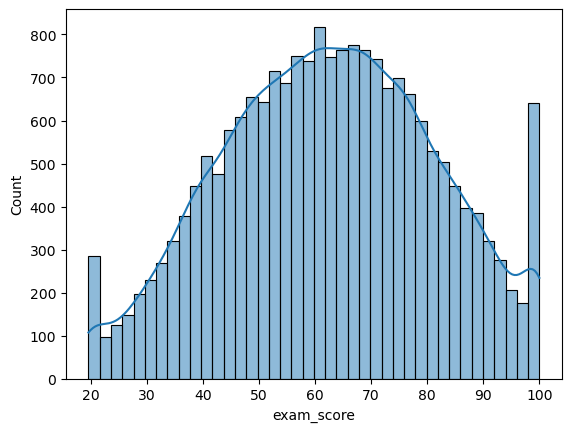

In [11]:
sns.histplot(df['age'])
plt.show()
sns.histplot(df['exam_score'], kde=True)
plt.show()


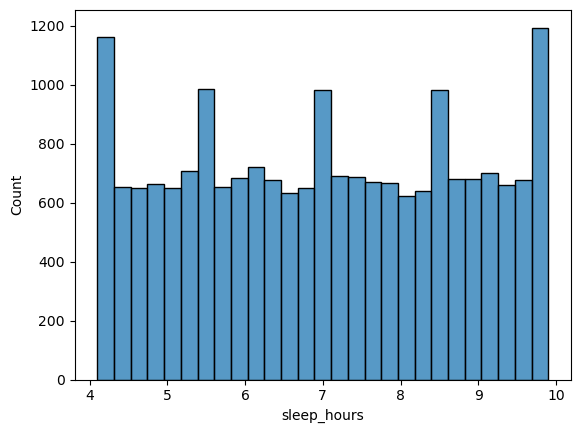

In [12]:
sns.histplot(df['sleep_hours'])
plt.show()

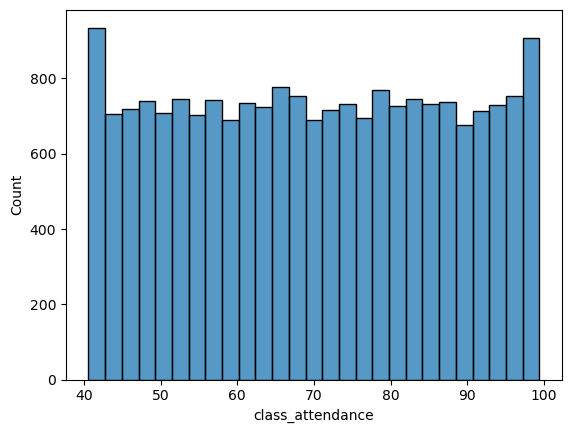

In [13]:
sns.histplot(df['class_attendance'])
plt.show()

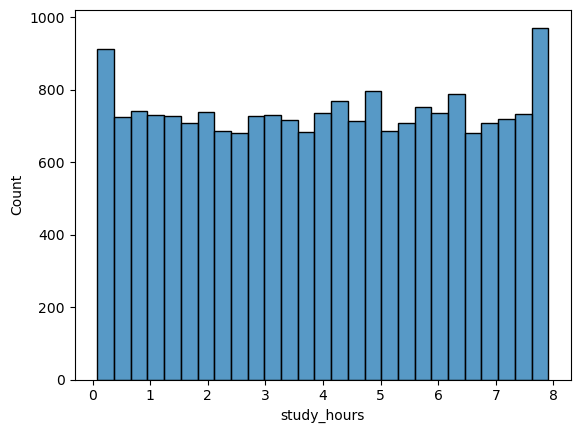

In [14]:
sns.histplot(df['study_hours'])
plt.show()

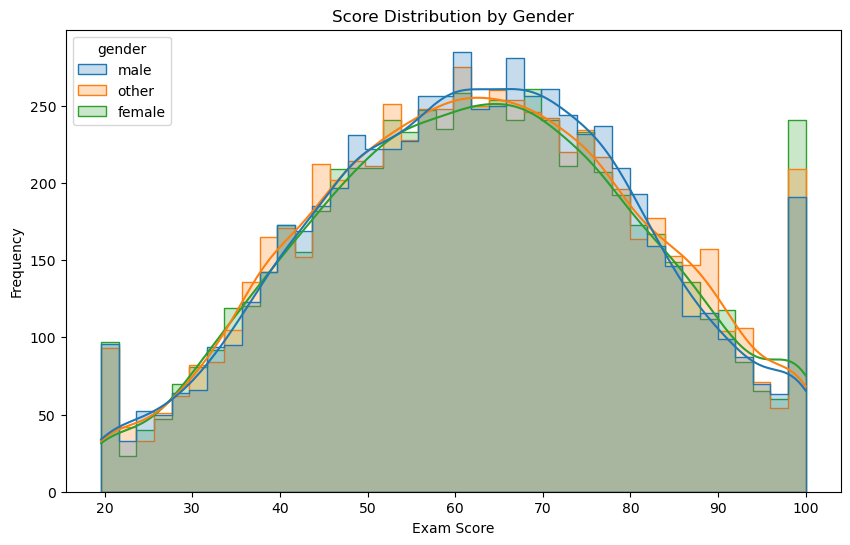

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='exam_score', hue='gender', kde=True, element="step")

plt.title('Score Distribution by Gender')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

converting the categorical columns using get_dummies 

In [16]:

df_encoded = pd.get_dummies(df, columns=['sleep_quality', 'study_method', 'exam_difficulty'],dtype=int)


df_encoded.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,facility_rating,exam_score,sleep_quality_average,sleep_quality_good,sleep_quality_poor,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
student_id,,,,,,,,,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,low,58.9,0,0,1,1,0,0,0,0,0,1,0
2,23,other,bca,3.37,64.8,yes,4.6,medium,54.8,1,0,0,0,0,0,1,0,0,0,1
3,22,male,b.sc,7.88,76.8,yes,8.5,high,90.3,0,0,1,1,0,0,0,0,0,0,1
4,20,other,diploma,0.67,48.4,yes,5.8,low,29.7,1,0,0,0,0,0,1,0,0,0,1
5,20,female,diploma,0.89,71.6,yes,9.8,low,43.7,0,0,1,1,0,0,0,0,0,0,1


In [17]:

newdf=df_encoded
newdf

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,facility_rating,exam_score,sleep_quality_average,sleep_quality_good,sleep_quality_poor,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
student_id,,,,,,,,,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,low,58.9,0,0,1,1,0,0,0,0,0,1,0
2,23,other,bca,3.37,64.8,yes,4.6,medium,54.8,1,0,0,0,0,0,1,0,0,0,1
3,22,male,b.sc,7.88,76.8,yes,8.5,high,90.3,0,0,1,1,0,0,0,0,0,0,1
4,20,other,diploma,0.67,48.4,yes,5.8,low,29.7,1,0,0,0,0,0,1,0,0,0,1
5,20,female,diploma,0.89,71.6,yes,9.8,low,43.7,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,18,other,bba,6.50,71.3,yes,5.0,low,86.5,0,1,0,0,0,0,0,1,1,0,0
19998,18,male,b.com,3.71,41.6,no,5.9,medium,60.9,1,0,0,1,0,0,0,0,0,0,1
19999,19,other,diploma,7.88,68.2,yes,4.6,low,64.5,0,0,1,0,1,0,0,0,1,0,0


In [18]:
newdf.drop(columns=['age','gender','internet_access','facility_rating','course'],inplace=True)
newdf

,study_hours,class_attendance,sleep_hours,exam_score,sleep_quality_average,sleep_quality_good,sleep_quality_poor,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
student_id,,,,,,,,,,,,,,,
1,2.78,92.9,7.4,58.9,0,0,1,1,0,0,0,0,0,1,0
2,3.37,64.8,4.6,54.8,1,0,0,0,0,0,1,0,0,0,1
3,7.88,76.8,8.5,90.3,0,0,1,1,0,0,0,0,0,0,1
4,0.67,48.4,5.8,29.7,1,0,0,0,0,0,1,0,0,0,1
5,0.89,71.6,9.8,43.7,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,6.50,71.3,5.0,86.5,0,1,0,0,0,0,0,1,1,0,0
19998,3.71,41.6,5.9,60.9,1,0,0,1,0,0,0,0,0,0,1
19999,7.88,68.2,4.6,64.5,0,0,1,0,1,0,0,0,1,0,0


In [19]:
newdf.columns 

Index(['study_hours', 'class_attendance', 'sleep_hours', 'exam_score',
       'sleep_quality_average', 'sleep_quality_good', 'sleep_quality_poor',
       'study_method_coaching', 'study_method_group study',
       'study_method_mixed', 'study_method_online videos',
       'study_method_self-study', 'exam_difficulty_easy',
       'exam_difficulty_hard', 'exam_difficulty_moderate'],
      dtype='object')

In [20]:
df['exam_score'].dtype

dtype('float64')

In [21]:
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')
mean_val = df['exam_score'].mean()

df.loc[df['exam_score'] == 100, 'exam_score'] = mean_val


In [22]:
df[['exam_score','study_hours','class_attendance','sleep_hours']].dtypes

exam_score          float64
study_hours         float64
class_attendance    float64
sleep_hours         float64
dtype: object

Making seperate categorical columns and numerical columns for easy understanding 


In [23]:

categorical_col= [
    'sleep_quality_good', 'sleep_quality_poor', 
    'study_method_coaching', 'study_method_group study', 
    'study_method_mixed', 'study_method_online videos', 
    'study_method_self-study', 'exam_difficulty_hard', 
    'exam_difficulty_moderate'
]


numerical_col = ['study_hours', 'class_attendance', 'sleep_hours']
all_col = numerical_col + categorical_col


X = newdf[all_col].astype(float)
y = newdf['exam_score'].astype(float)

Training of data using train_test_split and using Linear Regression 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


new_r2 = model.score(X_test, y_test)
print(f" R-squared Score: {new_r2:.4f}")

 R-squared Score: 0.7040


checking the importance of each columns 

In [25]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_
})

importance = importance.sort_values(by='Weight', ascending=False)
print(importance)

                       Feature    Weight
5        study_method_coaching  6.204293
0                  study_hours  5.867291
3           sleep_quality_good  4.593007
2                  sleep_hours  1.417899
7           study_method_mixed  1.274016
1             class_attendance  0.346371
11    exam_difficulty_moderate  0.214347
10        exam_difficulty_hard  0.097717
6     study_method_group study -1.503023
8   study_method_online videos -2.663592
9      study_method_self-study -3.311695
4           sleep_quality_poor -4.732876
